## Analysis of adversrial images

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils, generic_utils
from scipy.misc import imresize, imread, imshow
import skimage
import numpy as np
from skimage import io
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from utils import *

Using TensorFlow backend.
/dccstor/dlw/virtual_environments/python3.4/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/dccstor/dlw/virtual_environments/python3.4/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [53]:
work_dir = '/u/ambrish/models/keras_eg_alldrop2'
selected_img_idx = 13
n_r = 2
n_c = 5

In [54]:
mc_acc = np.load(os.path.join(work_dir,'mc_acc_e.npy'))
std_acc = np.load(os.path.join(work_dir,'std_acc_e.npy'))
eps = np.load(os.path.join(work_dir,'e.npy'))
mean_e = np.load(os.path.join(work_dir,'mean_e.npy'))
#mean_stddr_e = np.load(os.path.join(work_dir,'mean_stddr_e.npy'))
std_e = np.load(os.path.join(work_dir,'std_e.npy'))
var_ratio_e = np.load(os.path.join(work_dir,'var_ratio_e.npy'))
stoch_preds_e = np.load(os.path.join(work_dir,'stoch_preds_e.npy'))
save_adv_e = np.load(os.path.join(work_dir,'save_adv_e.npy'))

 ### Adversrial images were generated for the CIFAR test set consisting of 10000 images using FastGradientSign
 ### FastGradSign - moving away
 ### Labels taken for keras-eg-alldrop with std-droput interprtation

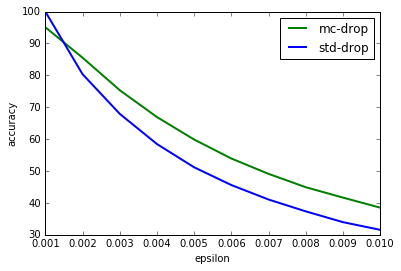

In [58]:
plt.plot(eps,100*mc_acc,color='g',linewidth=2, label='mc-drop')
plt.hold(True)
plt.plot(eps,100*std_acc,color='b',linewidth=2, label='std-drop')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('accuracy')

 - The following plot compares accruracy with respect to predctions from standard_droput model for different epsilons used in fgsm
 - As the label is taken from standard dropout model, the accuracy of mc_droput is lower
 - However, it is evident that the rate of change in accuracy is lower for mc_droput

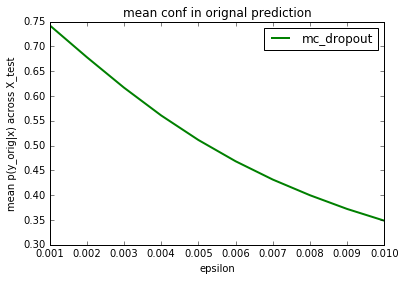

In [56]:
plt.plot(eps,mean_e,color='g',linewidth=2, label='mc_dropout')
plt.hold(True)
#plt.plot(eps,mean_stddr_e,color='b',linewidth=2, label='std_dropout')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('mean p(y_orig|x) across X_test')
plt.title('mean conf in orignal prediction')

- p(y_orig|x_adv) was computed for adverarial images generated for the X_test
- Here the original label is taken from std_dropout model

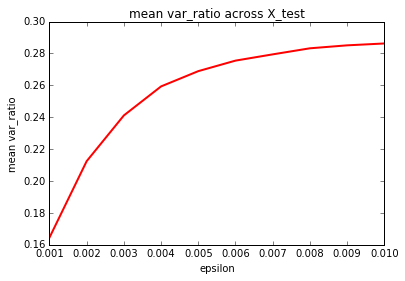

In [59]:
plt.plot(eps,var_ratio_e,color='r',linewidth=2)
plt.xlabel('epsilon')
plt.ylabel('mean var_ratio')
plt.title('mean var_ratio across X_test')

In [ ]:
plt.plot(eps,std_e,color='r',linewidth=2)
plt.xlabel('epsilon')
plt.ylabel('mean std')
plt.title('mean std across X_test')

In [36]:
m = save_adv_e
m = m[:,selected_img_idx,:,:,:]
m_ = np.concatenate(m,axis=0)
m_0 = np.concatenate([np.concatenate([m[0] for i in range(n_c)],axis=1) for j in range(n_r)], axis = 0)


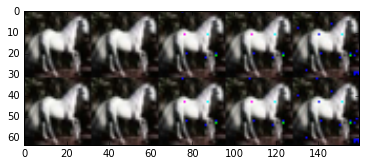

In [37]:
m_ = np.concatenate(m,axis=0)
m_ = np.concatenate([m_[j*n_r*32:(j+1)*n_r*32,:,:] for j in range(n_c)], axis = 1)
plt.imshow(m_)

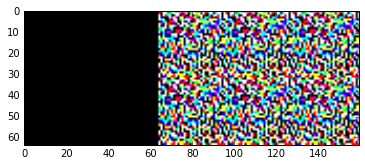

In [38]:
m_0 = np.concatenate([np.concatenate([m[0] for i in range(n_c)],axis=1) for j in range(n_r)], axis = 0)
plt.imshow(1.0*(m_-m_0))